In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\TOSHIBA\Downloads\kc_house_data.csv", parse_dates = ['date'])
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


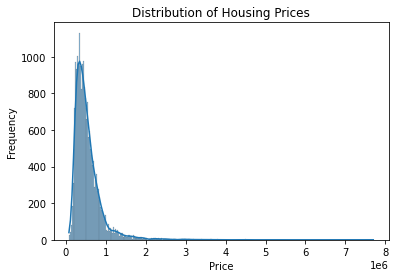

L'ensemble de données kc_house a 21613 points de données avec 21 variables chacunes.


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

df = pd.read_csv(r"C:\Users\TOSHIBA\Downloads\kc_house_data.csv", parse_dates = ['date'])
prices = df['price']
features = df.drop('price', axis = 1)

sns.histplot(prices, kde=True)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

print("L'ensemble de données kc_house a {} points de données avec {} variables chacunes.".format(*df.shape))


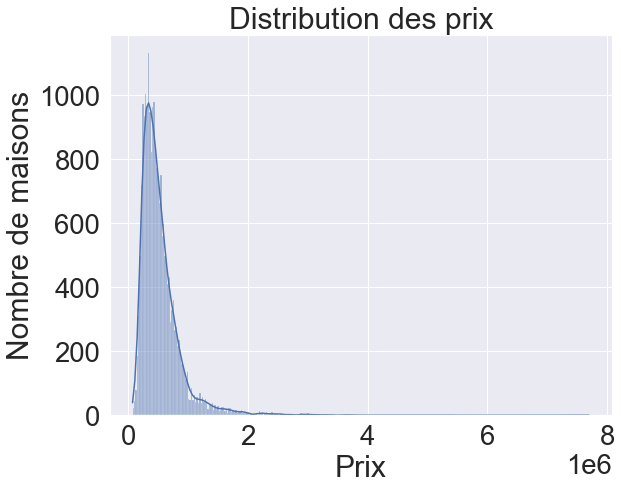

Statistiques pour le dataset des maisons de KC:

Prix minimum: $75,000.00
Prix maximum: $7,700,000.00
Prix moyen: $540,088.14
Prix médian: $450,000.00
Écart-type des prix: $367,118.70
Premier quartile des prix: $321,950.00
Troisième quartile des prix: $645,000.00
Intervalle interquartile des prix (IQR): $323,050.00


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\TOSHIBA\Downloads\kc_house_data.csv", parse_dates=['date'])
prices = df['price']

minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

plt.figure(figsize=(9, 7))
sns.histplot(data=prices, kde=True)
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.ylabel('Nombre de maisons')
plt.show()

print("Statistiques pour le dataset des maisons de KC:\n")
print("Prix minimum: ${:,.2f}".format(minimum_price))
print("Prix maximum: ${:,.2f}".format(maximum_price))
print("Prix moyen: ${:,.2f}".format(mean_price))
print("Prix médian: ${:,.2f}".format(median_price))
print("Écart-type des prix: ${:,.2f}".format(std_price))
print("Premier quartile des prix: ${:,.2f}".format(first_quartile))
print("Troisième quartile des prix: ${:,.2f}".format(third_quartile))
print("Intervalle interquartile des prix (IQR): ${:,.2f}".format(inter_quartile))


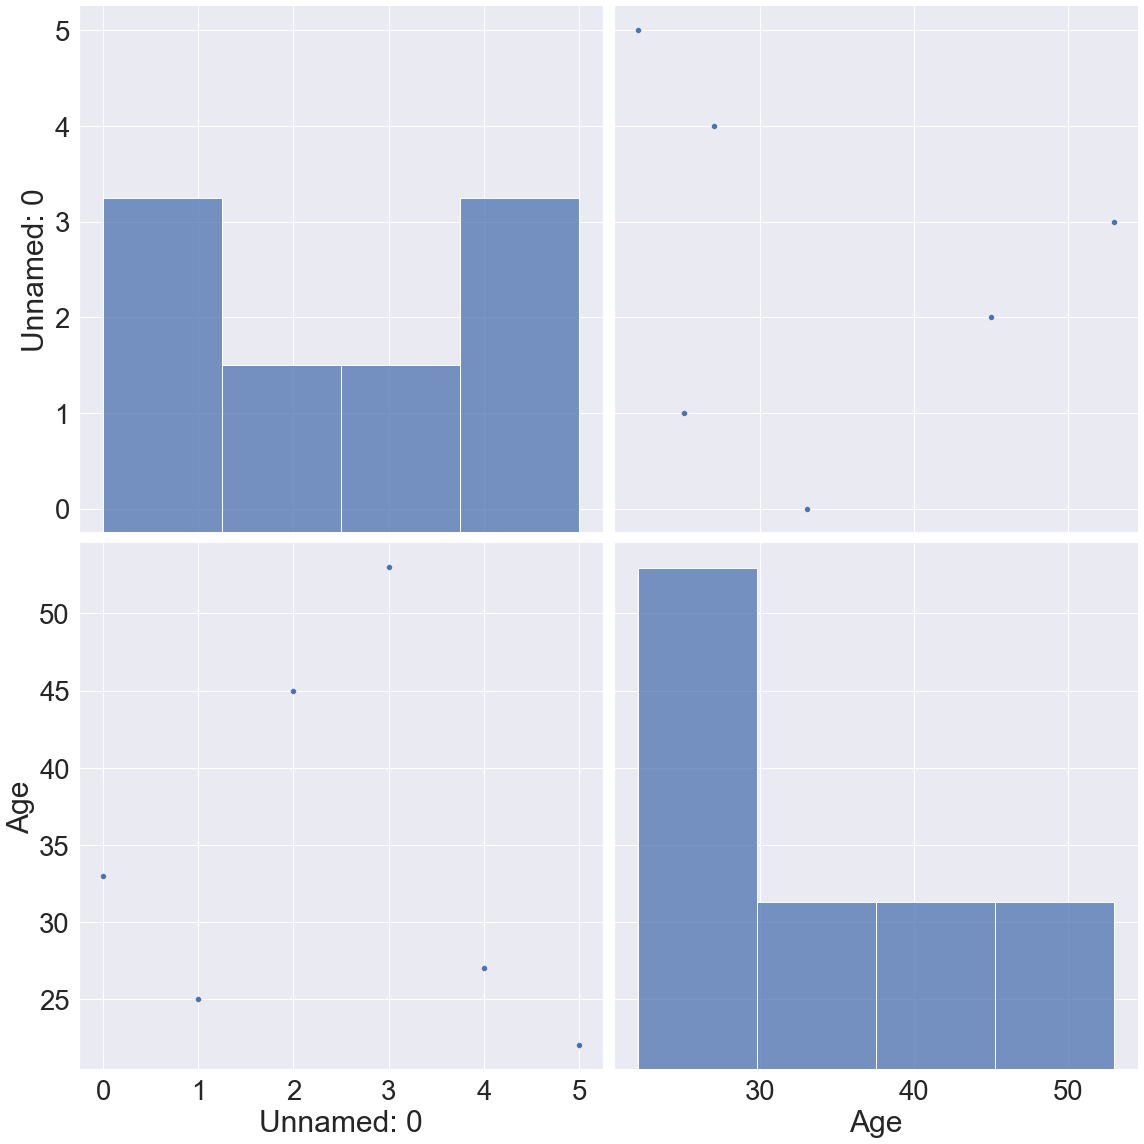

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', nrows=1000, usecols=[0,1,2,3,4])

sns.pairplot(df, height=10)
plt.tight_layout()
plt.show()


Root Mean Squared Error: 194036.23


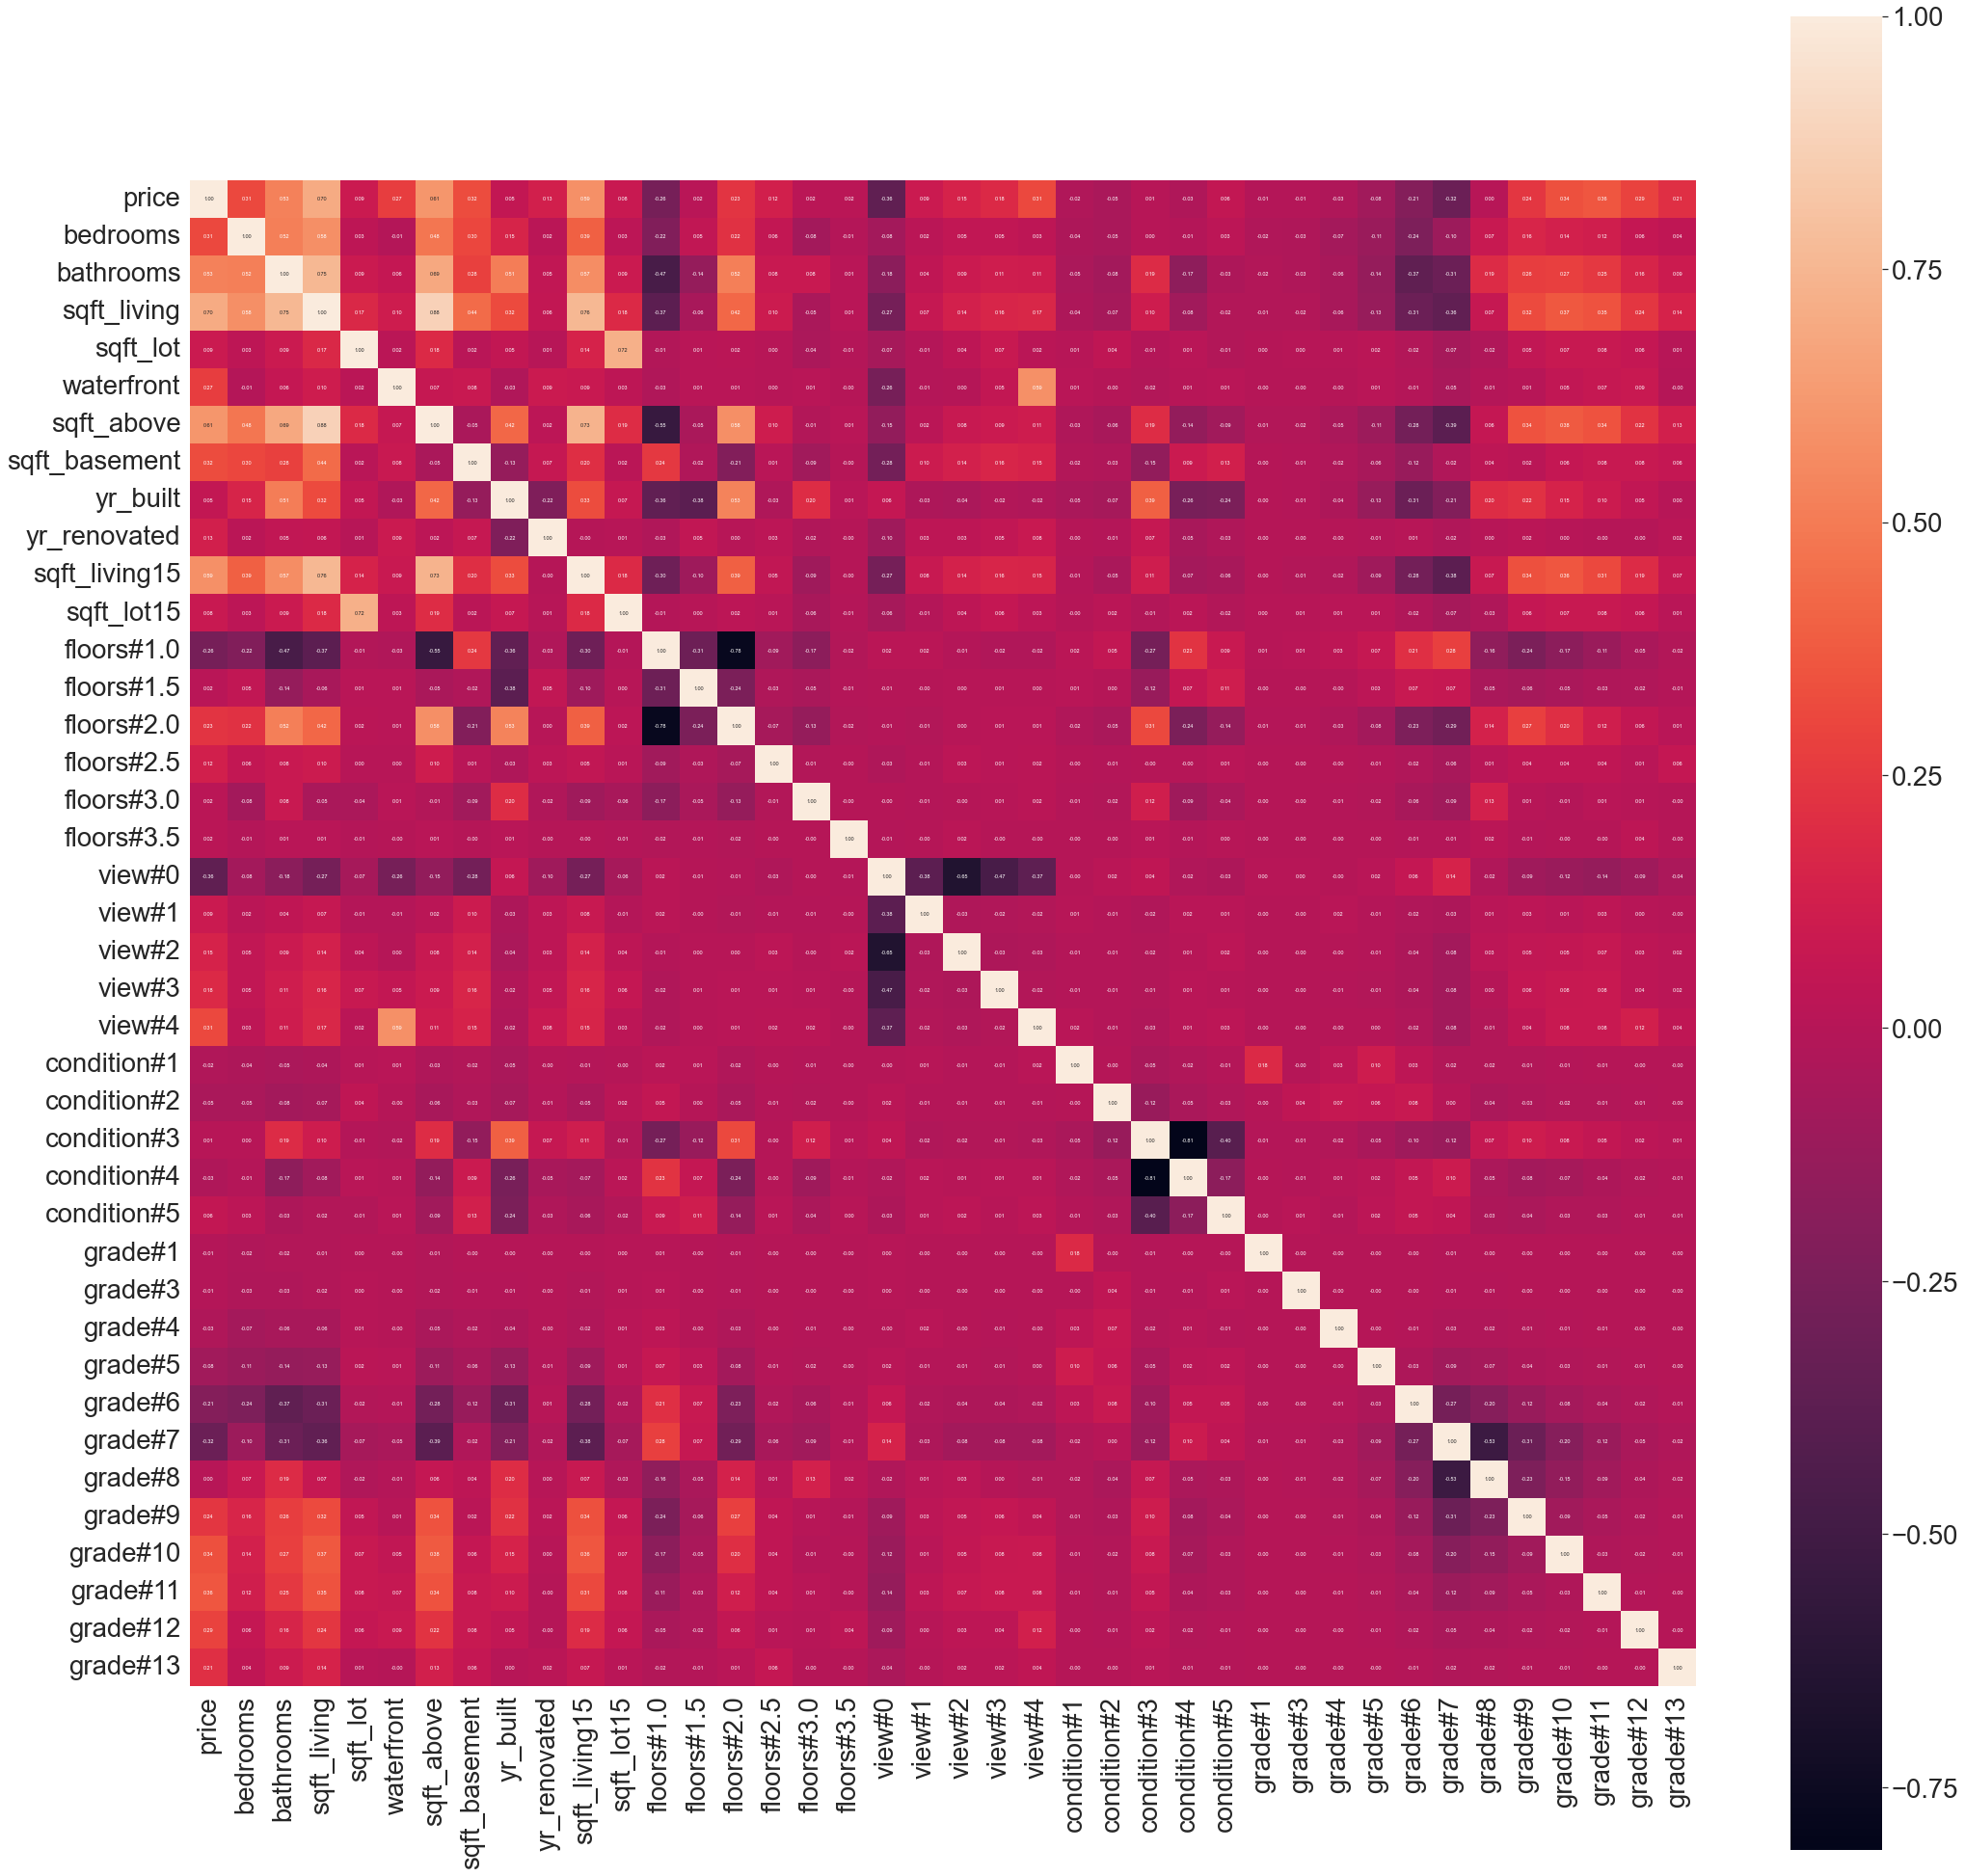

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = pd.read_csv(r"C:\Users\TOSHIBA\Downloads\kc_house_data.csv", parse_dates=['date'])

df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

df['floors'] = df['floors'].astype(str)

categorical_cols = ['floors', 'view', 'condition', 'grade']
for cc in categorical_cols:
    dummies = pd.get_dummies(df[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    df.drop(cc, axis=1, inplace=True)
    df = pd.concat([df, dummies], axis=1)

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = round((mse ** 0.5), 2)
print("Root Mean Squared Error: {}".format(rmse))

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(35, 35))
sns.set(font_scale=2.5)
hm = sns.heatmap(corr_matrix,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 5.5},
                yticklabels=df.columns,
                xticklabels=df.columns)
plt.show()


In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    r2 = r2_score(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    
    # Return the scores
    return r2, mse, mae


In [66]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on some training data
model.fit(X_train, y_train)

# Predict on some test data
y_pred = model.predict(X_test)

# Evaluate the performance using the performance_metric function
r2, mse, mae = performance_metric(y_test, y_pred)

print("R² score: {:.2f}".format(r2))
print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))


R² score: 0.68
MSE: 37650056654.89
MAE: 130883.42


In [69]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")


Training and testing split was successful.


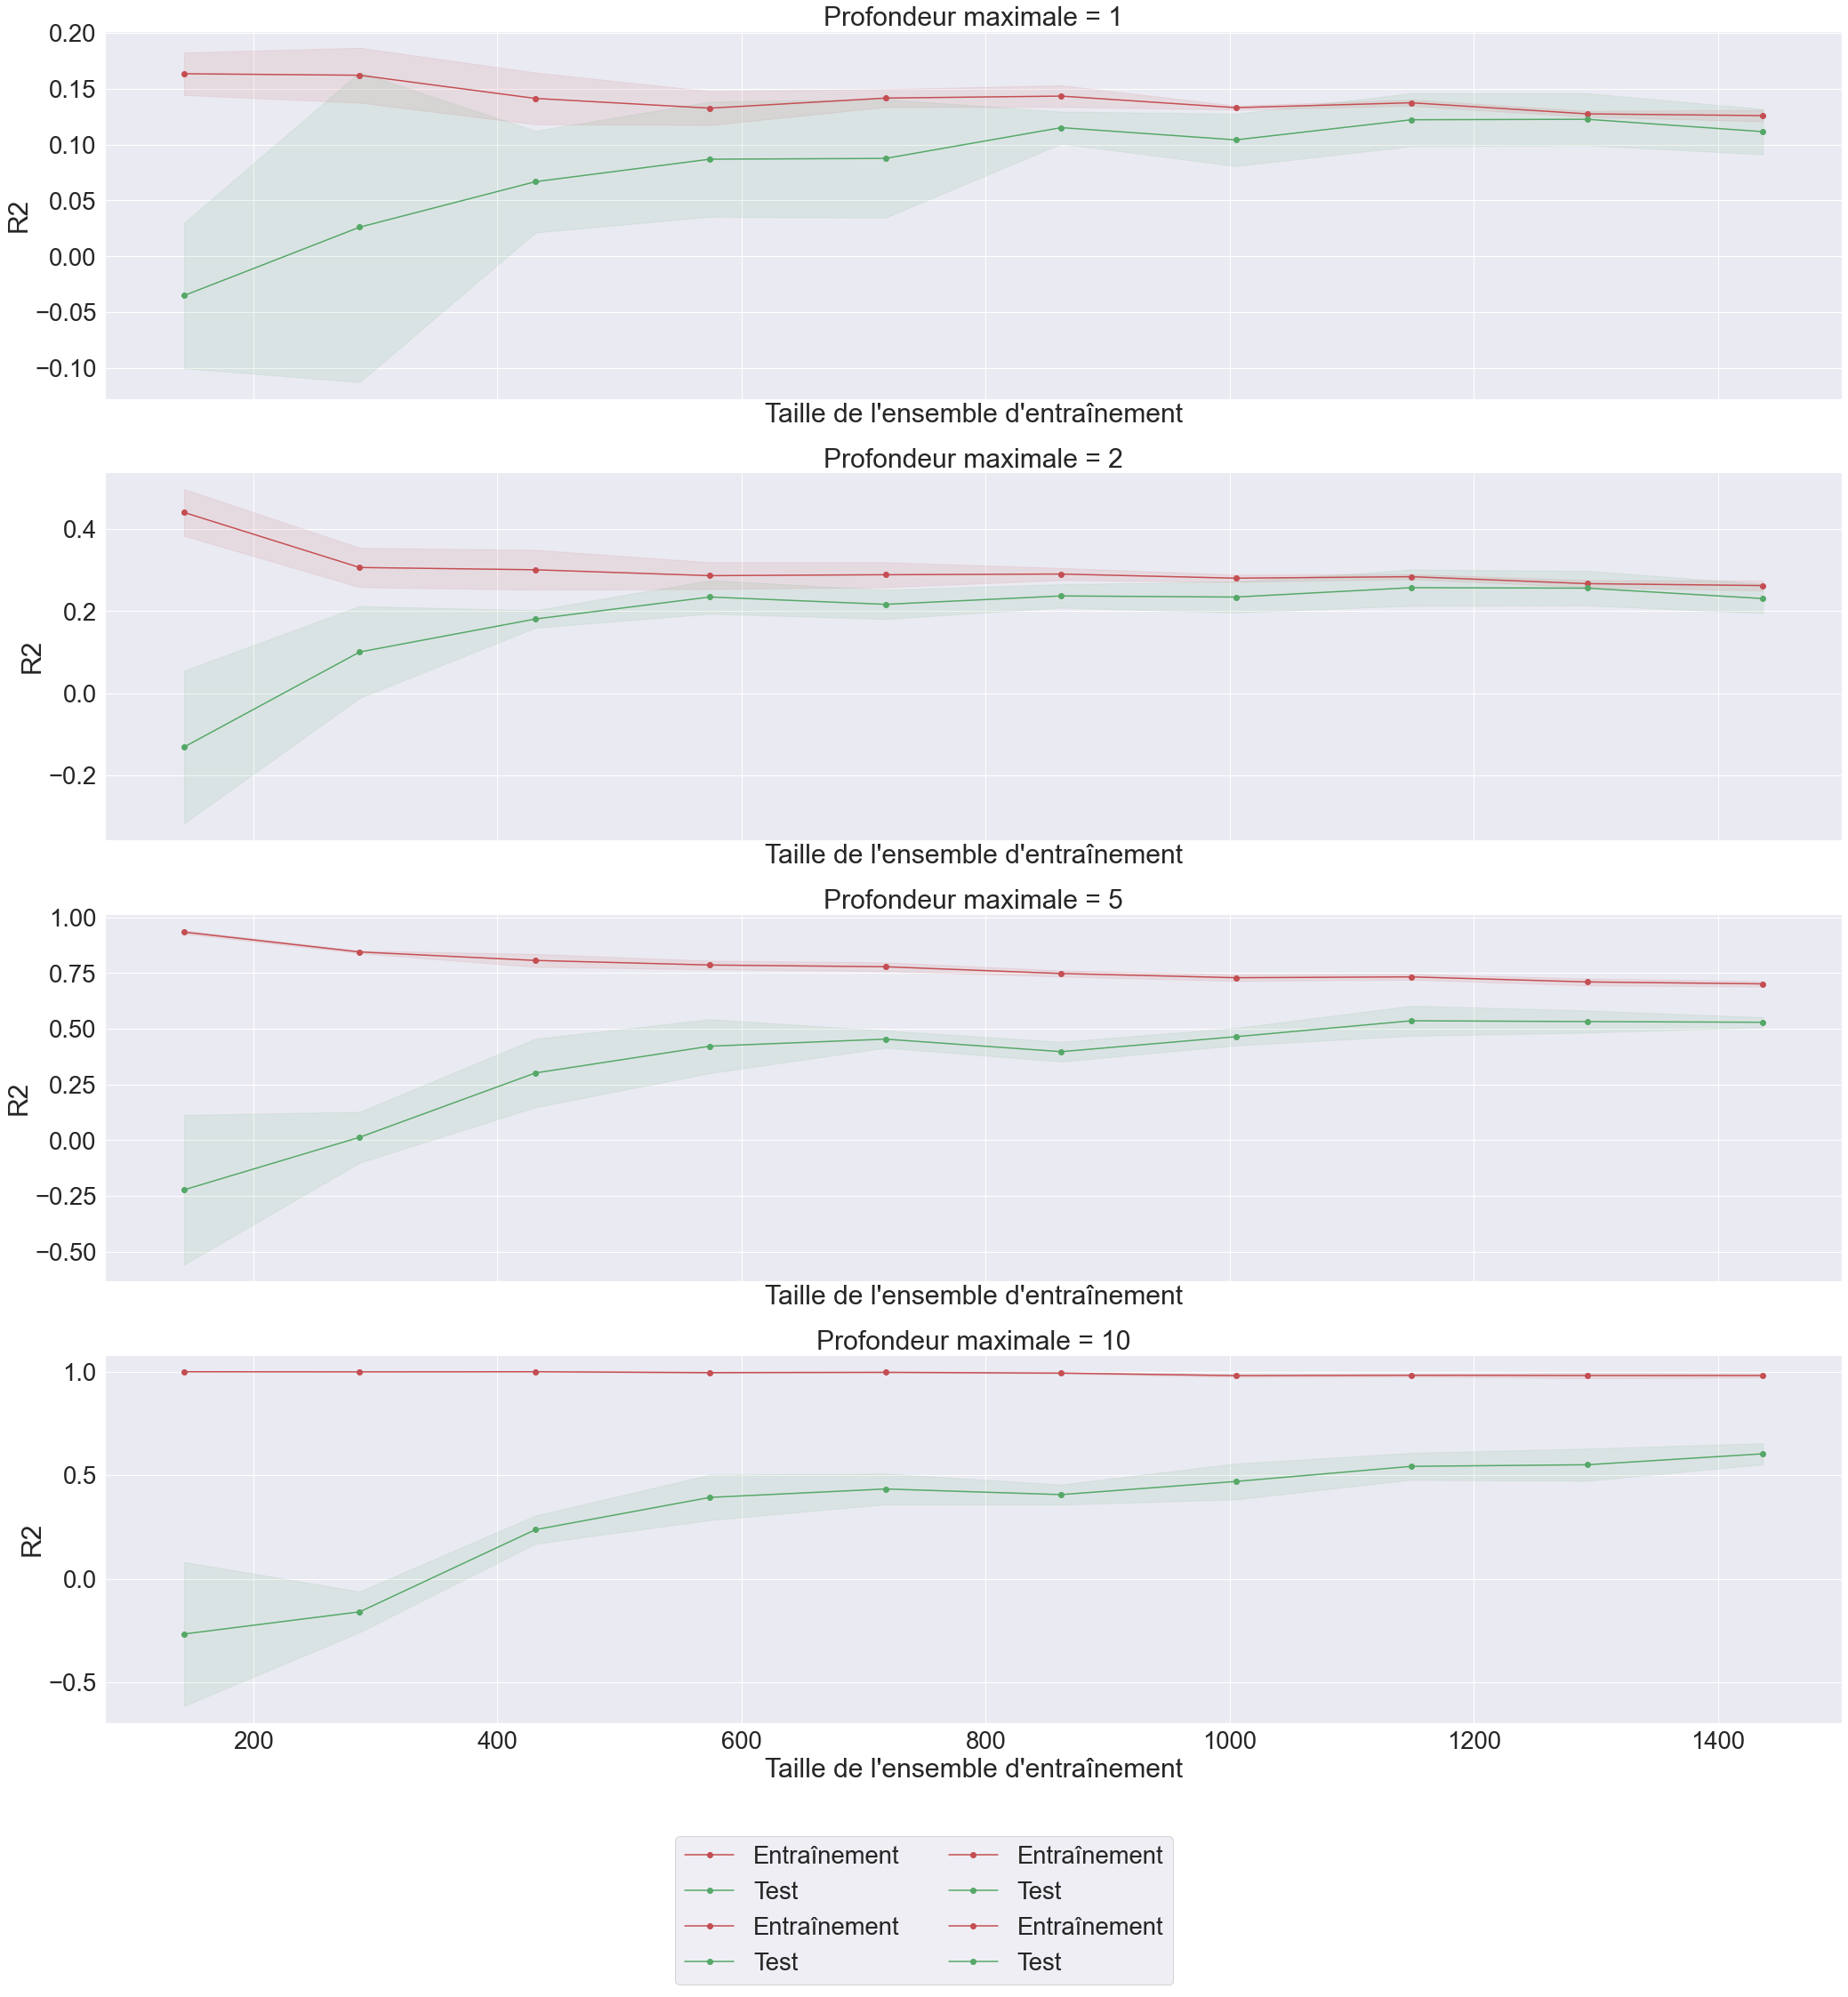

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve

max_depths = [1, 2, 5, 10]

train_sizes = np.linspace(0.1, 1.0, 10)

fig, axs = plt.subplots(nrows=len(max_depths), sharex=True, figsize=(35, 35))

for i, max_depth in enumerate(max_depths):
   
    model = DecisionTreeRegressor(max_depth=max_depth)

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axs[i].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axs[i].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axs[i].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entraînement")
    axs[i].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test")
    axs[i].set_title("Profondeur maximale = {}".format(max_depth))
    axs[i].set_xlabel("Taille de l'ensemble d'entraînement")
    axs[i].set_ylabel("R2")

fig.legend(loc='lower center', ncol=2)

plt.show()


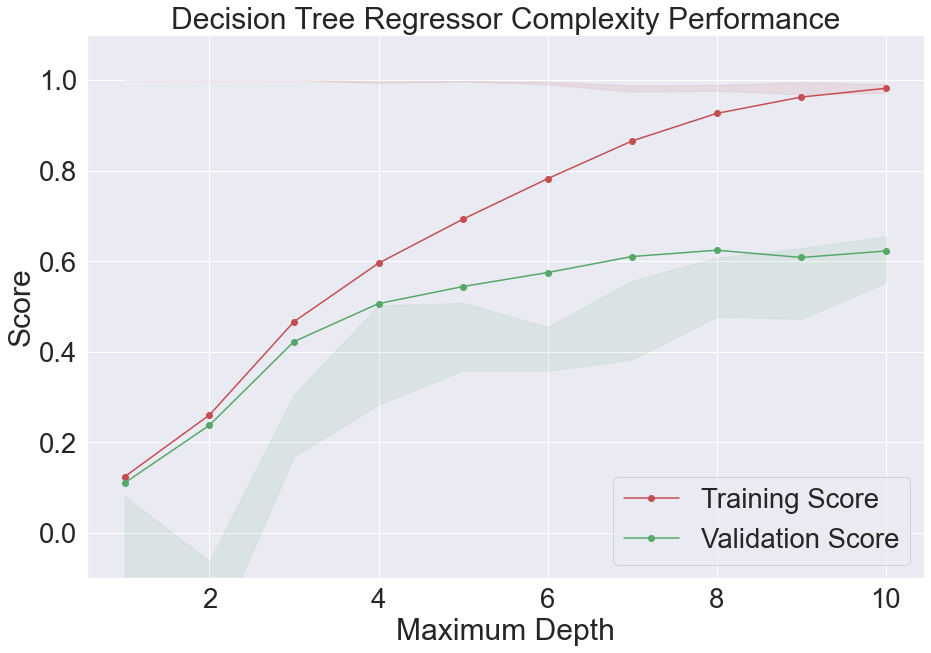

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, learning_curve

def ModelComplexity(X, y):
    """Calculate the complexity performance for the decision tree model."""

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1, 11)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(
        DecisionTreeRegressor(random_state=42),
        X, y, param_name="max_depth", param_range=max_depth,
        cv=10, scoring="r2")

    # Calculate the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(15, 10))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim(-0.1, 1.1)
    plt.plot(max_depth, train_mean, 'o-', color='r',
             label='Training Score')
    plt.plot(max_depth, test_mean, 'o-', color='g',
             label='Validation Score')
    plt.fill_between(max_depth, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(max_depth, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.legend(loc='lower right')
    plt.show()
 
#Call the ModelComplexity function
ModelComplexity(X, y)


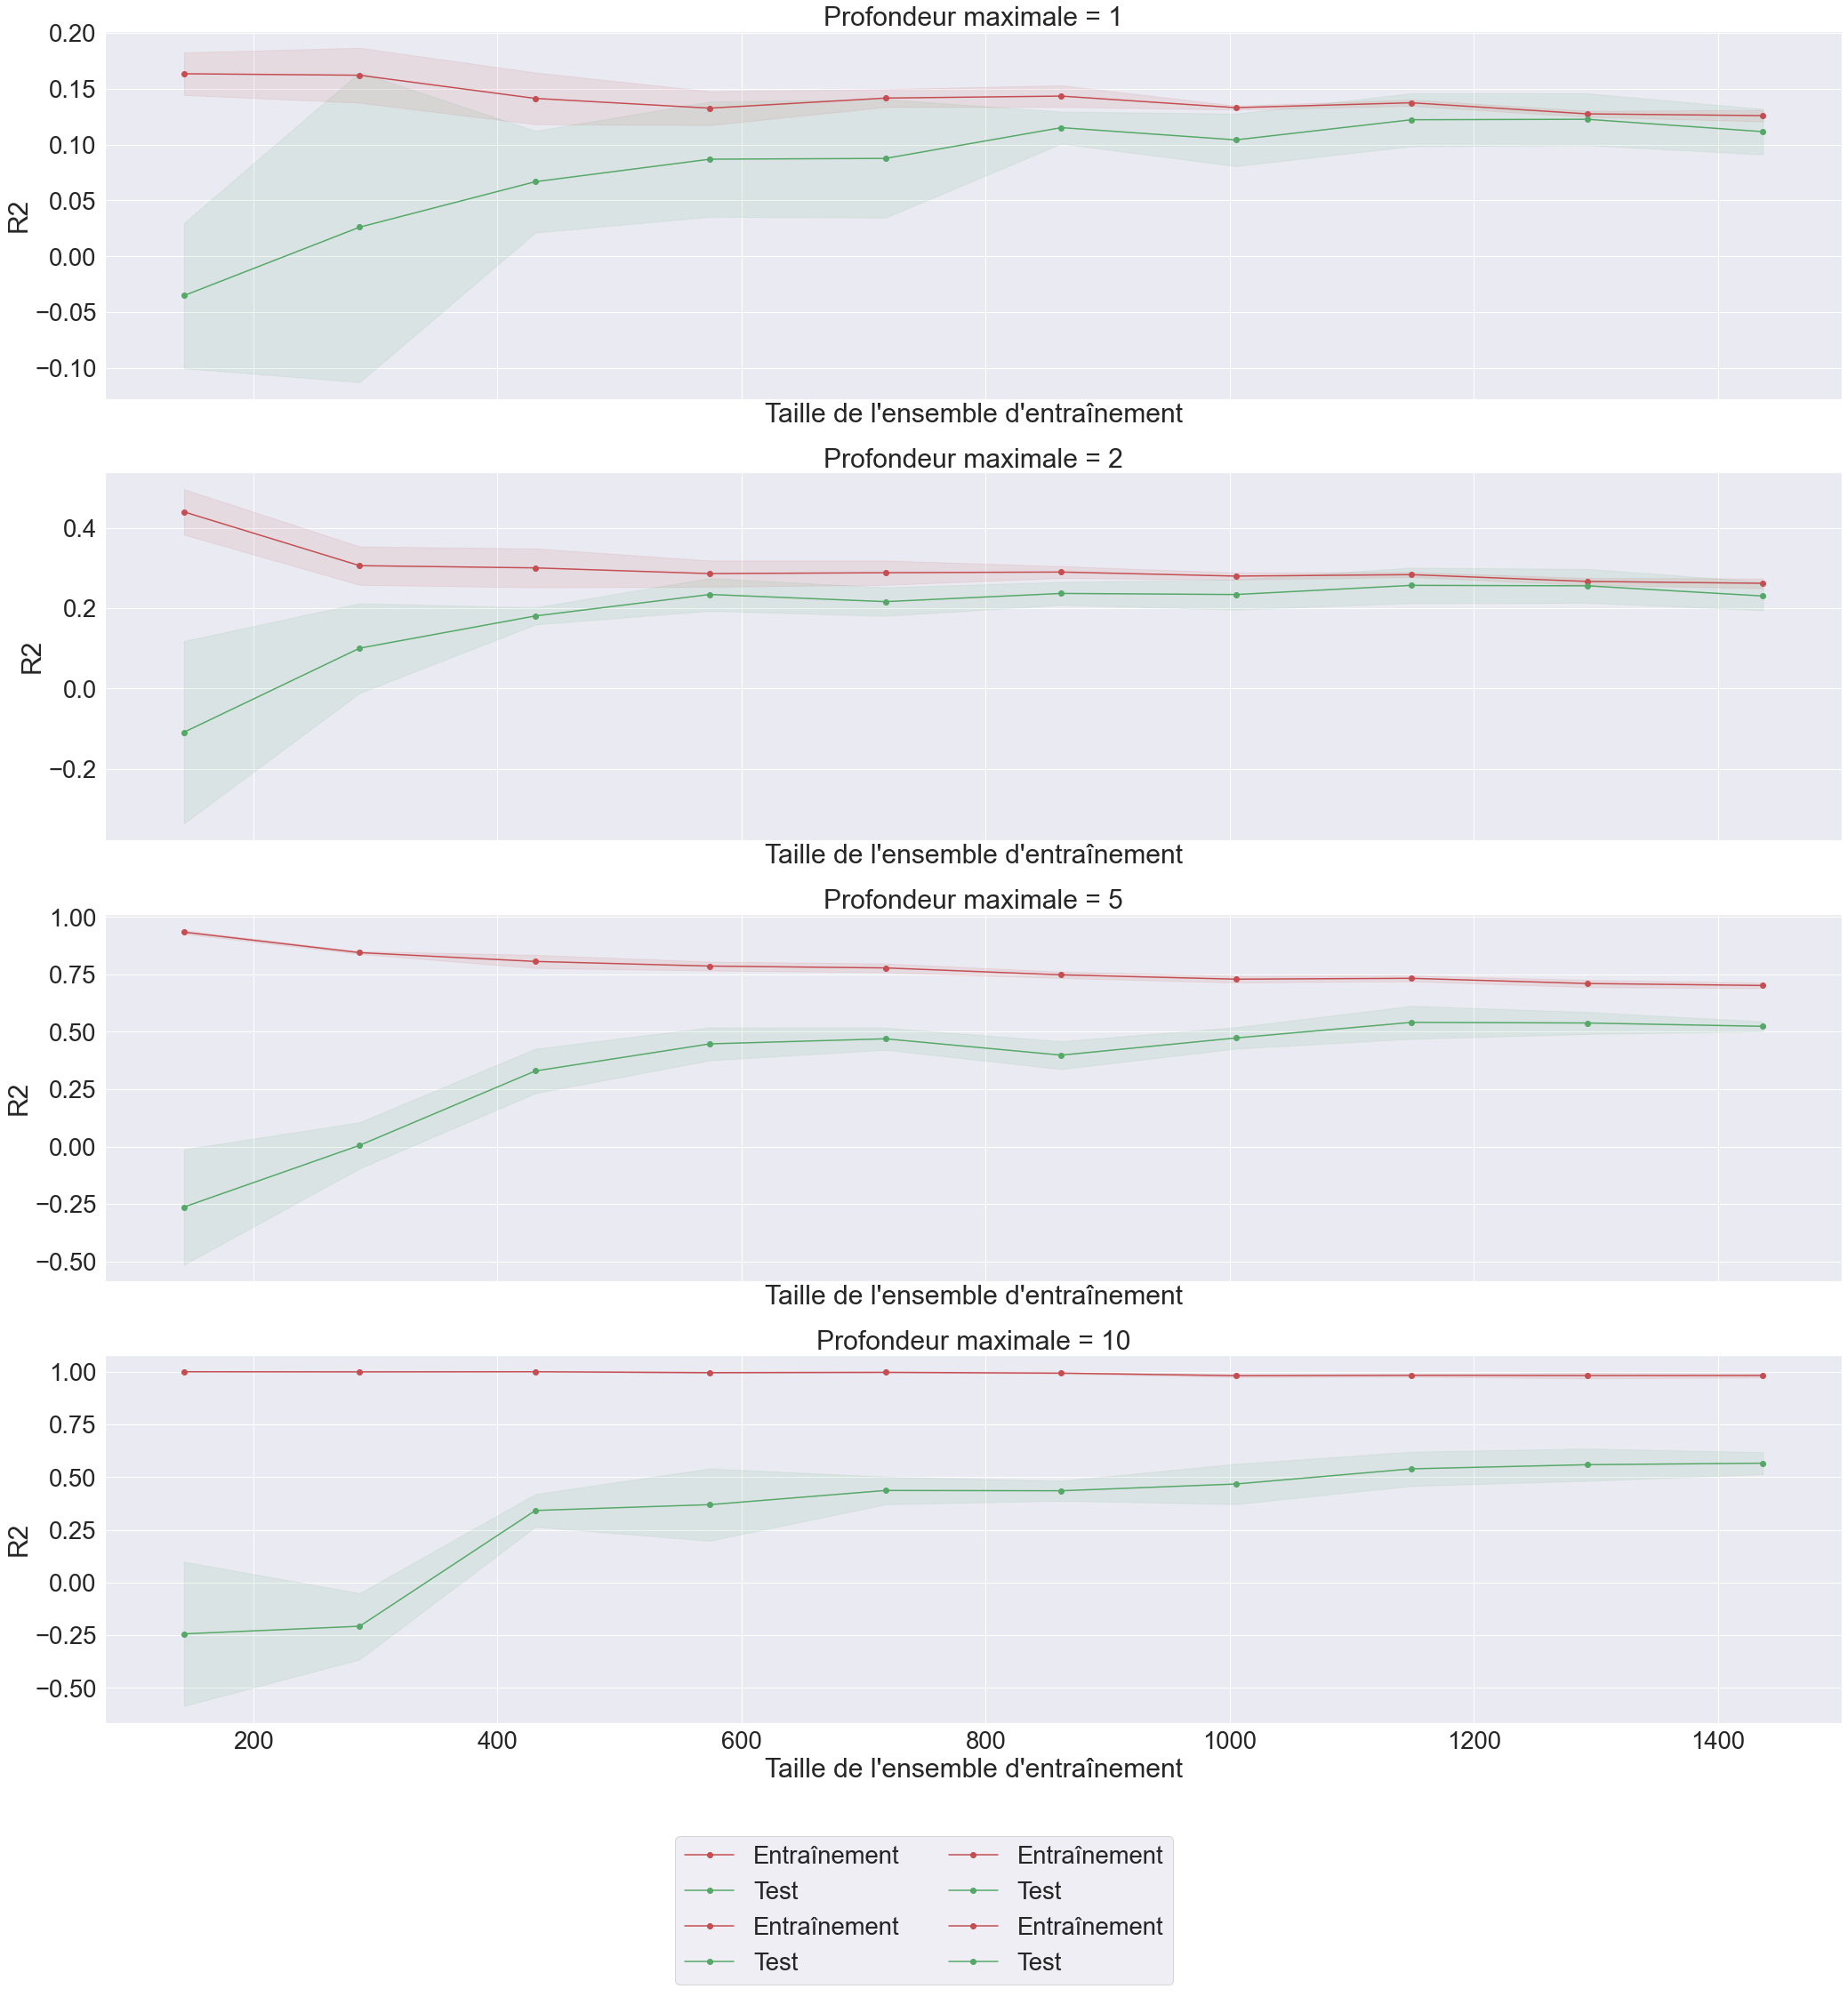

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve

max_depths = [1, 2, 5, 10]

train_sizes = np.linspace(0.1, 1.0, 10)

fig, axs = plt.subplots(nrows=len(max_depths), sharex=True, figsize=(35, 35))

for i, max_depth in enumerate(max_depths):
   
    model = DecisionTreeRegressor(max_depth=max_depth)

    train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    axs[i].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axs[i].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axs[i].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entraînement")
    axs[i].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test")
    axs[i].set_title("Profondeur maximale = {}".format(max_depth))
    axs[i].set_xlabel("Taille de l'ensemble d'entraînement")
    axs[i].set_ylabel("R2")

fig.legend(loc='lower center', ncol=2)

plt.show()

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_digits

# Chargement des données
digits = load_digits()
X, y = digits.data, digits.target

# Définition de la grille de recherche
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]

# Création d'un modèle SVM
svm = SVC()

# Recherche des meilleurs hyperparamètres avec GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X, y)

# Affichage des meilleurs hyperparamètres et score
print("Best hyperparameter : {}".format(grid_search.best_params_))
print("Score : {}".format(grid_search.best_score_))


Best hyperparameter : {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Score : 0.9721866295264624


In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def fit_model(X, y):
    """
    Effectue une recherche de grille sur le paramètre 'max_depth' pour un régresseur d'arbre de décision formé sur les données d'entrée [X, y].
    """

    # Créer des ensembles de validation croisée à partir des données de formation
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=42)

    # Créer un objet régresseur d'arbre de décision
    regressor = DecisionTreeRegressor()

    # Créer un dictionnaire pour le paramètre 'max_depth' avec une plage de 1 à 10
    parameters = {'max_depth': range(1, 11)}

    # Transformer 'performance_metric' en une fonction de score utilisable
    scoring_fnc = make_scorer(mean_squared_error, greater_is_better=False)

    # Créer un objet GridSearchCV
    grid = GridSearchCV(regressor, param_grid=parameters, scoring=scoring_fnc, cv=cv_sets)

    # Ajuster l'objet GridSearchCV aux données pour calculer le meilleur modèle
    grid.fit(X, y)

    # Retourner le meilleur modèle après ajustement
    return grid.best_estimator_

# Utiliser la fonction pour trouver le modèle optimal
reg = fit_model(X_train, y_train)

# Obtenir la valeur optimale pour 'max_depth'
print("La valeur optimale de 'max_depth' est {} pour le modèle optimal.".format(reg.get_params()['max_depth']))


La valeur optimale de 'max_depth' est 8 pour le modèle optimal.
